# Logistic Regression



In [286]:
# import the required libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
import seaborn as sb
import pandas as pd

%matplotlib inline


In [287]:
data_1 = pd.read_csv(r"C:\Users\it\Desktop\Shuja's Own\Python Projects\Logistic Regression\data1.csv", header = None)
data_1

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [288]:
mydata_1 = data.to_numpy()
print(mydata_1.shape)
X = mydata_1[:,0:2]
Y = mydata_1[:,2]
print(X)
print(Y)

(100, 3)
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86

We will first build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions
decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

The following cell will load the data and corresponding labels:

### Step 1: Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. We  display the data on a 2-dimensional plot by calling the function `plotData`. 

In [289]:
def plotData(X, y):
    fig = plt.figure()
    fig = sb.scatterplot(x = X[:,0], y = X[:,1], hue  = y[:,], style = y , markers = ['o', '*'], legend = 1 )       
    return plt.show  

Now, we call the implemented function to display the loaded data:

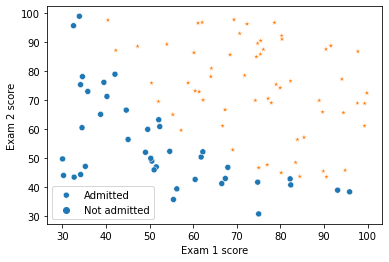

In [290]:
plotData(X, Y)
# add axes labels
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
pass


###  Implementation

#### Sigmoid function

The logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.


In [291]:
def sigmoid(z):

    # convert input to a numpy array
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1/(1+(np.exp(-z)))
    return g

The following cell evaluates the sigmoid function at `z=0`. You should get a value of 0.5. You can also try different values for `z` to experiment with the sigmoid function.

g( 0 ) =  0.5
g( 0.5 ) =  0.62


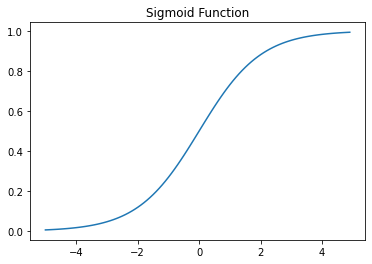

In [292]:
z = 0
g = sigmoid(z)
print('g(', z, ') = ', g)
z = 0.5
g = sigmoid(z)
print('g(', z, ') = ', round(g, 2))
e = np.arange(-5,5,0.1)
s=sigmoid(e)
plt.plot(e,s)
plt.title("Sigmoid Function")
plt.show()

####  Cost function and gradient

Now we will implement the cost function and gradient for logistic regression. Before proceeding we add the intercept term to X. 

In [293]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

The cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [294]:
X.shape

(100, 3)

In [295]:
theta = np.zeros((n+1,1))
z = np.dot(X,theta)
h = sigmoid(z)
J = (1/m)*np.sum((np.dot(-Y,np.log(h)) - np.dot((1-Y),np.log(1-h))))
grad = (1/m)*((h-Y).dot(X))
print(J)
#print(grad)

0.6931471805599452


In [296]:
def costFunction(theta, X, y):
    m = y.size  # number of training examples
    J = 0
    grad = np.zeros(theta.shape)
    z = np.dot(X,theta)
    print(z.shape)
    h = sigmoid(z)
    J = (1/m)*np.sum((np.dot(-y,np.log(h)) - np.dot((1-y),np.log(1-h))))
    grad = (1/m)*((h-y).dot(X))
    return J, grad

Once you are done call your `costFunction` using two test cases for  $\theta$ by executing the next cell.

In [297]:
# Initialize fitting parameters
initial_theta = np.zeros((n+1,1))

cost, grad = costFunction(initial_theta, X, Y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
#print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, Y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

(100, 1)
Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

(100,)
Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


####  Learning parameters using `scipy.optimize`

In [298]:
options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X,Y),
                        jac=True,
                        method='TNC',
                        options=options)
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


Once `optimize.minimize` completes, we want to use the final value for $\theta$ to visualize the decision boundary on the training data as shown in the figure below.

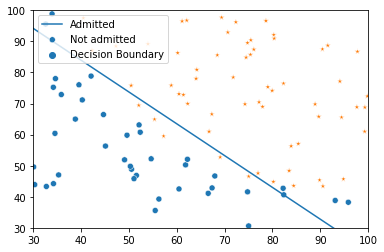

In [299]:
def plotDecisionBoundary(plotData, theta, X,Y):
    theta = np.array(theta)
    plotData(X[:, 1:3], Y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        #pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
# Plot Boundary
plotDecisionBoundary(plotData, theta, X,Y )


#### Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776. Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. 

In [300]:
def predict(theta, X):
    
    m = X.shape[0] # Number of training examples
    p = np.zeros(m)
    p = X.dot(theta)
    a = np.dot(X,theta)
    b = sigmoid(a)
    c = np.array([])
    for i in range(b.size):
      if b[i] >= 0.5:
        p[i] = 1  #overwrite the values of p with 1s where sigmoid is greater than 0.5
      elif b[i] <= 0.5:
        p[i] = 0  #overwrite the values of p with 0s where sigmoid is less than 0.5
    return p

After you have completed the code in `predict`, we proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [301]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == Y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


## 2 Regularized logistic regression
Now we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

First, we load the data from a CSV file:

In [302]:
data_2 = pd.read_csv(r"C:\Users\it\Desktop\Shuja's Own\Python Projects\Logistic Regression\data2.csv", header = None)
data_2

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [303]:
mydata_2 = data_2.to_numpy()
print(mydata_2.shape)
X_2 = mydata_2[:,0:2]
y_2 = mydata_2[:,2]
print(X_2)
print(y_2)
print(X_2.shape)
print(y_2.shape)

(118, 3)
[[ 0.051267   0.69956  ]
 [-0.092742   0.68494  ]
 [-0.21371    0.69225  ]
 [-0.375      0.50219  ]
 [-0.51325    0.46564  ]
 [-0.52477    0.2098   ]
 [-0.39804    0.034357 ]
 [-0.30588   -0.19225  ]
 [ 0.016705  -0.40424  ]
 [ 0.13191   -0.51389  ]
 [ 0.38537   -0.56506  ]
 [ 0.52938   -0.5212   ]
 [ 0.63882   -0.24342  ]
 [ 0.73675   -0.18494  ]
 [ 0.54666    0.48757  ]
 [ 0.322      0.5826   ]
 [ 0.16647    0.53874  ]
 [-0.046659   0.81652  ]
 [-0.17339    0.69956  ]
 [-0.47869    0.63377  ]
 [-0.60541    0.59722  ]
 [-0.62846    0.33406  ]
 [-0.59389    0.005117 ]
 [-0.42108   -0.27266  ]
 [-0.11578   -0.39693  ]
 [ 0.20104   -0.60161  ]
 [ 0.46601   -0.53582  ]
 [ 0.67339   -0.53582  ]
 [-0.13882    0.54605  ]
 [-0.29435    0.77997  ]
 [-0.26555    0.96272  ]
 [-0.16187    0.8019   ]
 [-0.17339    0.64839  ]
 [-0.28283    0.47295  ]
 [-0.36348    0.31213  ]
 [-0.30012    0.027047 ]
 [-0.23675   -0.21418  ]
 [-0.06394   -0.18494  ]
 [ 0.062788  -0.16301  ]
 [ 0.22984   -0.

###  Visualize the data

Similar to the previous parts of this exercise, `plotData` is used to generate a figure, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with
different markers.

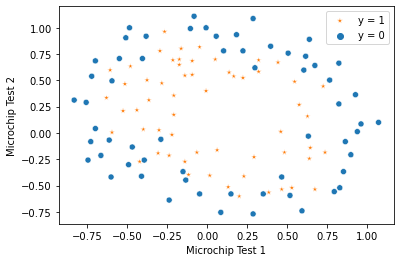

In [304]:
plotData(X_2, y_2)
# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Specified in plot order
plt.legend(['y = 1', 'y = 0'], loc='upper right')
pass

The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### Feature mapping

One way to fit the data better is to create more features from each data point. In the function `mapFeature` defined in the file `utils.py`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [305]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
def mapFeature(X1, X2, degree=6):
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)


X2_map = mapFeature(X_2[:, 0], X_2[:, 1])
print(X2_map)
print(X2_map.shape)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]
(118, 28)


###  Cost function and gradient

Now we will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function `costFunctionReg` below to return the cost and gradient.

Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
<a id="costFunctionReg"></a>

In [306]:
def costFunctionReg(theta, X, y, lambda_):
    m = y.size  # number of training examples
    J = 0
    grad = np.zeros(theta.shape)
    z = np.dot(X,theta)
    h = sigmoid(z)
    J = (1/m)*np.sum(np.dot(-y,np.log(h)) - np.dot((1-y),np.log(1-h))) + (lambda_/(2*m))*np.square(theta)
    for j in range(X.shape[1]):
      if j == 0:
        g = (1/m) * (np.dot((h-y),X))
        grad[0] = g[0]
      elif j > 0:
        g = ((1/m) * np.dot((h-y),X)) + ((lambda_ / m) * theta)
        grad[j] = g[j]
    return J, grad

Once you are done with the `costFunctionReg`, we call it below using the initial value of $\theta$ (initialized to all zeros), and also another test case where $\theta$ is all ones.

In [311]:
# Initialize fitting parameters
initial_theta = np.zeros(X2_map.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X2_map, y_2, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format,cost)
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X2_map.shape[1])
cost, grad = costFunctionReg(test_theta, X2_map, y_2, 10)
print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format,cost)
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

<built-in method format of str object at 0x000002134383F870> [0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718 0.69314718 0.69314718]
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

<built-in method format of str object at 0x00000213436DF7B0> [2.06281442 2.06281442 2.06281442 2.06281442 2.06281442 2.06281442
 2.06281442 2.06281442 2.06281442 2.06281442 2.06281442 2.06281442
 2.06281442 2.06281442 2.06281442 2.06281442 2.06281442 2.06281442
 2.06281442 2.06281442 2.06281442 2.06281442 2.06281442 2.06281442
 2.06281442 2.06281442 2.06